In [45]:
%matplotlib inline

In [69]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [71]:
import collections as col

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from thalesians.tsa.distrs import NormalDistr as N
import thalesians.tsa.filtering as filtering
import thalesians.tsa.filtering.calibration as calibration
import thalesians.tsa.filtering.kalman as kalman
import thalesians.tsa.filtering.visual as visual
import thalesians.tsa.numpyutils as npu
import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim

In [72]:
rnd.random_state(np.random.RandomState(seed=42), force=True);

In [73]:
X = proc.OrnsteinUhlenbeckProcess.create_multiscale_from_vol(transition_vector=[20., 20.], mean=20., vol=[[10., .0], [.0, 3.]])

In [74]:
X.transition

array([[ 20.,   0.],
       [-20.,  20.]])

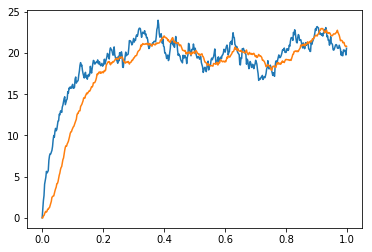

In [75]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=1., step=.002))
df = sim.run(em)
plt.plot(df);

In [76]:
filtr = filtering.kalman.KalmanFilter(time=df.index[0], state_distr=N(mean=npu.col(0., 0.), cov=1000. * np.eye(2)), process=X)
state_observable = filtr.create_identity_observable(X)
first_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[1., 0.]]), X)
last_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[0., 1.]]), X)

In [48]:
filtering.run(observable=last_observable, obss=1, df=df)

KalmanObsResult(gain=[[ 2.36319875]
 [ 1.        ]])

In [49]:
run_df = filtering.run(observable=last_observable, obss=1, df=df, return_df=True)

ValueError: Predicting the past (current time=0.998, prediction time=0.0)

In [ ]:
sp = visual.StatePlot(plot_obs_results=False)
sp.process_run_df(run_df)
sp.ax.set_ylim((-5, 25));

In [ ]:
run_df

In [ ]:
op = visual.ObsPlot();
op.process_run_df(run_df[1:])

In [ ]:
ep = visual.InnovPlot()
ep.process_run_df(run_df[1:])
ep.ax.set_ylim((-1, 1));

In [ ]:
llp = visual.ErrorPlot();
llp.process_run_df(run_df[1:])

In [ ]:
llp = visual.LogLikelihoodPlot(cumulative=True);
llp.process_run_df(run_df)

In [ ]:
llp = visual.LogLikelihoodPlot(cumulative=False)
llp.process_run_df(run_df)

In [ ]:
run_df

In [ ]:
cp = visual.CUSUMPlot()
cp.process_run_df(run_df)

In [ ]:
gp = visual.GainPlot(matrix_norm=False)
gp.process_run_df(run_df)

In [ ]:
gp = visual.GainPlot(matrix_norm=True)
gp.process_run_df(run_df)

In [77]:
filtr = filtering.kalman.KalmanFilter(time=df.index[0], state_distr=N(mean=npu.col(0., 0.), cov=1000. * np.eye(2)), process=X)
state_observable = filtr.create_identity_observable(X)
first_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[1., 0.]]), X)
last_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[0., 1.]]), X)

In [78]:
ts, priors, posteriors, prior_values, posterior_values = [], [], [], [], []
for i, t in enumerate(df.index):
    ts.append(t)
    priors.append(state_observable.predict(t))
    prior_values.append(priors[-1].distr.mean.flatten())
    process_value = df.iloc[i].values
    last_observable.observe(N(process_value[-1], 0.), t)
    posteriors.append(state_observable.predict(t))
    posterior_values.append(posteriors[-1].distr.mean.flatten())
priors_df = pd.DataFrame(data=priors, index=ts)
posteriors_df = pd.DataFrame(data=posteriors, index=ts)
prior_values_df = pd.DataFrame(data=prior_values, index=ts)
posterior_values_df = pd.DataFrame(data=posterior_values, index=ts)

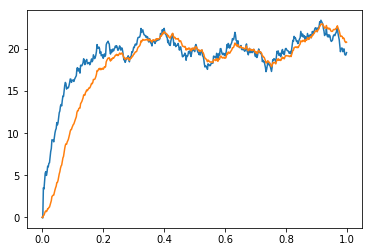

In [79]:
plt.plot(posterior_values_df);

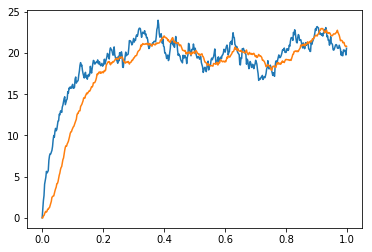

In [80]:
plt.plot(df);